# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

The objective is to evaluate the combinations of sole material, insole thickness, and fabric breathability to determine which make the most comfortable running shoe.

2.  Specify the outcome variable and how it is measured.

The outcome variable is comfort rated on a 1-10 scale.

3.  Specify the independent variables. What lurking variables may be present?

The independent variables are sole material, insole thickness, and fabric breathability. Some potential lurking variables that would affect comfort are arch support, flexibility, and weight.

4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

A $2^k$ factorial design uses pairwise comparisons of treatment effect (with two levels) which allows for less trials which is beneficial when trials are costly/demanding. A full-factorial design tests the effect of all treatment levels and their interactions but requires more trials for all combinations of treatments. Given that we have three runners each testing one shoe but 8 possible combinations of shoe charactersitics, a $2^k$ factorial design is more fitting.

5.  State the sets of null and alternative hypotheses for this experiment.

 For our main effects:

$$ H_{01}: \alpha_{\text{EVA foam}} = \alpha_{\text{Gel foam}} = 0 $$
$$ H_{11}: \text{At least one } \alpha_i \neq 0 $$

$$ H_{02}: \beta_{\text{3mm}} = \beta_{\text{6mm}} = 0 $$
$$ H_{12}: \text{At least one } \beta_j \neq 0 $$

$$ H_{03}: \gamma_{\text{woven}} = \gamma_{\text{mesh}} = 0 $$
$$ H_{13}: \text{At least one } \gamma_k \neq 0 $$

- For our two-way interactions:

$$ H_{04}: (\alpha\beta)_{ij} = 0 \text{ for all } i,j $$
$$ H_{14}: \text{At least one } (\alpha\beta)_{ij} \neq 0 $$

$$ H_{05}: (\alpha\gamma)_{ik} = 0 \text{ for all } i,k $$
$$ H_{15}: \text{At least one } (\alpha\gamma)_{ik} \neq 0 $$

$$ H_{06}: (\beta\gamma)_{jk} = 0 \text{ for all } j,k $$
$$ H_{16}: \text{At least one } (\beta\gamma)_{jk} \neq 0 $$

- For our three-way interaction:

$$ H_{07}: (\alpha\beta\gamma)_{ijk} = 0 \text{ for all } i,j,k $$
$$ H_{17}: \text{At least one } (\alpha\beta\gamma)_{ijk} \neq 0 $$

6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sole_material     24 non-null     object 
 1   insole_thickness  24 non-null     object 
 2   breathability     24 non-null     object 
 3   comfort           24 non-null     float64
dtypes: float64(1), object(3)
memory usage: 900.0+ bytes
None
                   mean       std
sole_material                    
EVA            7.093638  1.076122
Gel            9.043596  1.545309
                      mean       std
insole_thickness                    
3mm               7.441465  1.387030
6mm               8.695768  1.684642
                   mean       std
breathability                    
Mesh           7.504218  1.272221
Woven          8.633016  1.818369
                                    mean       std
sole_material insole_thickness                    
EVA           3mm               

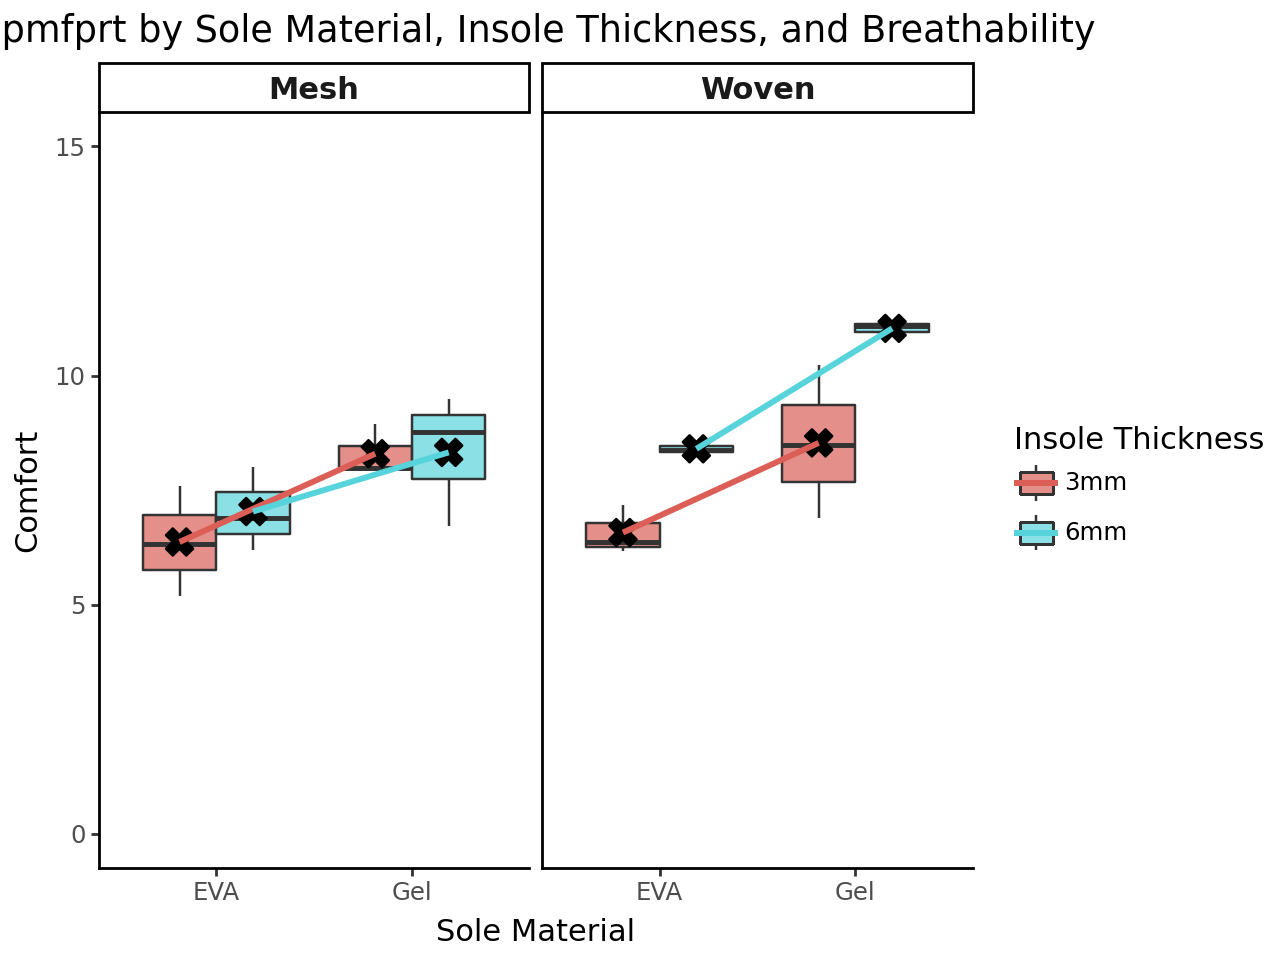

In [11]:
## Question 6 Code ##
## Import Relevant Packages ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in Chess Data ##

shoe = pd.read_excel("Shoe Comfort Experiment.xlsx")

## Data Integrity Check ##

print(shoe.info())

## Exploratory Data Analysis ##
## Start with Main Effects ##

## sole material ##

sole_stats = shoe.groupby("sole_material")["comfort"].agg(['mean', 'std'])

print(sole_stats)

## insole thickness ##

insole_stats = shoe.groupby("insole_thickness")["comfort"].agg(['mean', 'std'])

print(insole_stats)

## breathability ##

breathe_stats = shoe.groupby("breathability")["comfort"].agg(['mean', 'std'])

print(breathe_stats)

## TWO WAY ##

## sole x insole ##

sole_insole_stats = shoe.groupby(["sole_material", "insole_thickness"])["comfort"].agg(['mean', 'std'])

print(sole_insole_stats)

## sole x breathability ##

sole_breathe_stats = shoe.groupby(["sole_material", "breathability"])["comfort"].agg(['mean', 'std'])

print(sole_breathe_stats)

## insole x breathability ##

insole_breathe_stats = shoe.groupby(["insole_thickness", "breathability"])["comfort"].agg(['mean', 'std'])

print(insole_breathe_stats)

## THREE WAY ##
## sole x insole x breathability ##

three_stats = shoe.groupby(["sole_material", "insole_thickness", "breathability"])["comfort"].agg(['mean', 'std'])

print(three_stats)



## VISUALS ##
## Install plotnine
#%pip install plotnine
## Import all plotnine functions ##:
from plotnine import *

# Prepare summarized data
shoe_means = three_stats.reset_index()[["sole_material", "insole_thickness", "breathability", "mean"]]

# Define dodge position for aligning points/lines with the boxplots
box_dodge = position_dodge(0.75)

# Build a single faceted plot
p = (
    ggplot(shoe, aes(x='sole_material', y='comfort')) +

    # 1. Boxplot layer (base visualization)
    geom_boxplot(aes(fill='insole_thickness'), alpha=0.7, position=box_dodge) +

    # 2. Mean points (using separate summary data)
    geom_point(
        data=shoe_means,
        mapping=aes(y='mean', group='insole_thickness'),
        shape='X',
        size=5,
        position=box_dodge,
        color='black'
    ) +

    # 3. Mean lines
    geom_line(
        data=shoe_means,
        mapping=aes(y='mean', group='insole_thickness', color='insole_thickness'),
        size=1.2,
        position=box_dodge
    ) +

    # 4. Facet by Coaching (two panels side-by-side)
    facet_wrap('~breathability', ncol=2) +

    # 5. Styling and labels
    labs(
        title = "Cpmfprt by Sole Material, Insole Thickness, and Breathability",
        x = "Sole Material",
        y = "Comfort",
        fill = "Insole Thickness",
        color = "Insole Thickness"
    ) +

    theme_classic() +
    theme(
        plot_title = element_text(hjust=0.5),
        strip_text = element_text(size=11, weight='bold')
    ) +

    scale_y_continuous(limits=(0, 15))
)

# Display
p

The univariate exploratory analysis suggests that Gel soles have a higher average comfort score than EVA soles. Woven shoe material had higher average comfort scores for both the EVA and Gel soles. 6mm insoles also had higher average comfort scores. The boxplots suggests that the most comfortable combination is gel soles, 6mm thick insoles and woven shoe material.

7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?


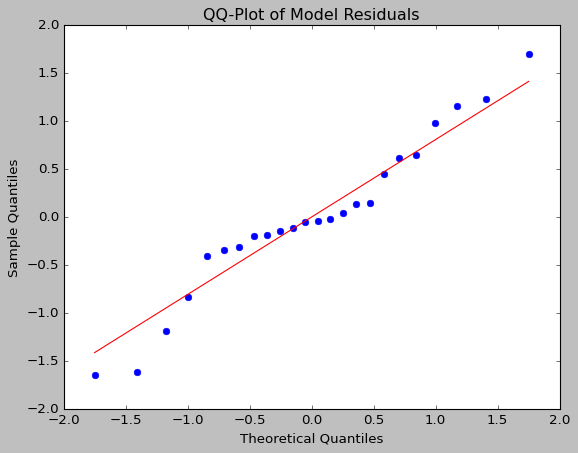

Shapiro-Wilk Test Results:
Statistic: 0.959532741725587
p-value: 0.42910705030991836


In [14]:
## Question 7 Code ##

## Import Statsmodels ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

## Fit Full Factorial Model ##

model = ols('comfort ~ sole_material*insole_thickness*breathability', data=shoe).fit()

## Parse out model residuals ##

residuals = model.resid

## Test of Normality ##

## QQ-Plot ##

sm.qqplot(residuals, line='s')
plt.title("QQ-Plot of Model Residuals")
plt.show()

## Shapiro-Wilk Test ##

shapiro_test = stats.shapiro(residuals)

print("Shapiro-Wilk Test Results:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")




Normality conditions are met, the points on the QQ plot do not systematically deviate from the diagonal line and the p-value for the SW test is greater than 0.05.


8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?


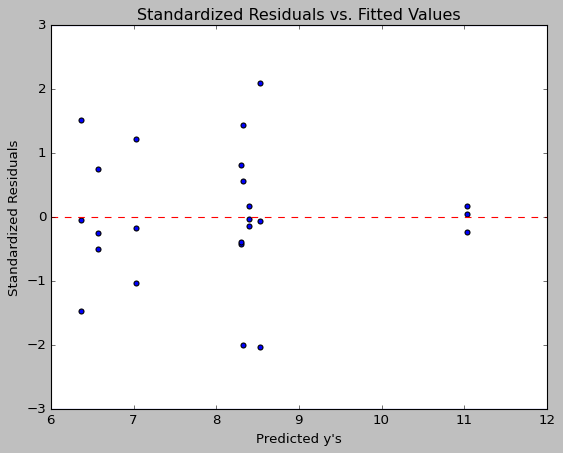

F-statistic: 2.2615166027197584
F p-value: 0.08366429231760693


In [15]:
## Question 8 Code ##
## Test of Homogeneity of Variance ##

## Scatterplot of Standardized Residuals vs. Fitted Values ##

## Get Standardized Residuals ##

standardized_residuals = model.get_influence().resid_studentized_internal

## Get Fitted Values ##

fitted_values = model.fittedvalues

## Scatterplot ##

## Create the plot ##

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

## B-P Test ##

## Run B-P Test ##

bp_test = het_breuschpagan(residuals, model.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")

The assumption of homogeneity is met given that all points of the residual plot fall between -3 and 3 and the p-value for the B-P test is greater than 0.05.


9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?


In [16]:
## Question 9 Code ##
## Print ANOVA Table Results ##

anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                                                  sum_sq    df           F  \
Intercept                                     121.658350   1.0  124.536350   
sole_material                                   5.564969   1.0    5.696617   
insole_thickness                                0.661288   1.0    0.676932   
breathability                                   0.063498   1.0    0.065000   
sole_material:insole_thickness                  0.303143   1.0    0.310314   
sole_material:breathability                     0.000661   1.0    0.000676   
insole_thickness:breathability                  1.013879   1.0    1.037864   
sole_material:insole_thickness:breathability    0.641055   1.0    0.656220   
Residual                                       15.630245  16.0         NaN   

                                                    PR(>F)  
Intercept                                     5.847132e-09  
sole_material                                 2.969092e-02  
insole_thickness                    

The only statistically significant effect was sole material. All other main effects and interaction effects were not significant facotrs.


10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?


In [19]:
## Question 10 Code ##
## Load pingouin ##
import pingouin as pg

## Fit ANOVA with pingouin ##

mod_p = pg.anova(dv='comfort',between=["sole_material","insole_thickness","breathability"],data=shoe,effsize="np2").round(4)

print(mod_p[["Source","np2"]])

                                             Source     np2
0                                     sole_material  0.5934
1                                  insole_thickness  0.3765
2                                     breathability  0.3285
3                  sole_material * insole_thickness  0.0000
4                     sole_material * breathability  0.0429
5                  insole_thickness * breathability  0.2405
6  sole_material * insole_thickness * breathability  0.0394
7                                          Residual     NaN


The most important effects are the main effects (sole material, insole thickness, and breathability, respectively). With the interaction of insole thickness and breathability having a slightly smaller effect size.


11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?

The only significant running shoe feature that impacted comfort was sole material with gel soles having higher avergae comfort levels. Sole material also had the highest effect size on comfort therefore, I would recommend gel soles. The combination with the highest average comfort level was gel soles, 6mm thick insoles, and woven material for the shoe which would be my recommended combination.


## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

The objective of this experiment is to determine which combination of fitness band features (GPS accuracy, battery life, and display) yield the highest satisfaction level.

2.  Specify the outcome variable and how it is measured.

The outcome variable is satisfaction rated 0-10.

3.  Specify the independent variables. What lurking variables may be present?

The independent variables are GPS accuracy, battery life, and display. Some lurking variables may be watch comfort, appearance, and any other tech features the watches may have

4.  Explain the difference between a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design. Briefly comment on why the latter may be preferred in this case.

The main difference in a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design is that a fractional design requires less trials at the cost of not being able to differentiate main effects and interactions. Due to the costly nature of producing the fitness bands, less trials is more reasonable and therefore a fractional design is preferred.

5.  State the sets of null and alternative hypotheses for this experiment.

For our main effects:

$$ H_{01}: \alpha_{\text{standard GPS}} = \alpha_{\text{high GPS}} = 0 $$
$$ H_{11}: \text{At least one } \alpha_i \neq 0 $$

$$ H_{02}: \beta_{\text{6 hours}} = \beta_{\text{12 hours}} = 0 $$
$$ H_{12}: \text{At least one } \beta_j \neq 0 $$

$$ H_{03}: \gamma_{\text{small}} = \gamma_{\text{large}} = 0 $$
$$ H_{13}: \text{At least one } \gamma_k \neq 0 $$

- For our two-way interactions:

$$ H_{04}: (\alpha\beta)_{ij} = 0 \text{ for all } i,j $$
$$ H_{14}: \text{At least one } (\alpha\beta)_{ij} \neq 0 $$

$$ H_{05}: (\alpha\gamma)_{ik} = 0 \text{ for all } i,k $$
$$ H_{15}: \text{At least one } (\alpha\gamma)_{ik} \neq 0 $$

$$ H_{06}: (\beta\gamma)_{jk} = 0 \text{ for all } j,k $$
$$ H_{16}: \text{At least one } (\beta\gamma)_{jk} \neq 0 $$

- For our three-way interaction:

$$ H_{07}: (\alpha\beta\gamma)_{ijk} = 0 \text{ for all } i,j,k $$
$$ H_{17}: \text{At least one } (\alpha\beta\gamma)_{ijk} \neq 0 $$

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

A = BC
B = AC
C = AB

The main effects are confounded with the two-factor interactions

7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run_ID        12 non-null     int64  
 1   Replicate     12 non-null     int64  
 2   GPS_Accuracy  12 non-null     object 
 3   Battery_Life  12 non-null     object 
 4   Display       12 non-null     object 
 5   Satisfaction  12 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 708.0+ bytes
None
   Run_ID  Replicate GPS_Accuracy Battery_Life Display  Satisfaction
0       1          1     Standard      6 Hours   Large          5.97
1       1          2     Standard      6 Hours   Large          5.92
2       1          3     Standard      6 Hours   Large          5.26
3       2          1         High      6 Hours   Small          4.76
4       2          2         High      6 Hours   Small          5.21
   Run_ID  Replicate GPS_Accuracy Battery_Life Display  Satisfaction

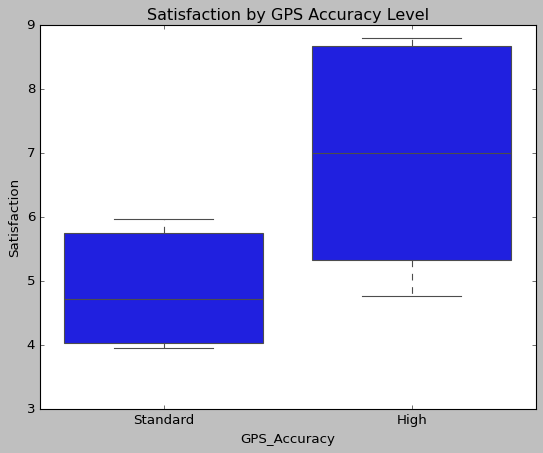

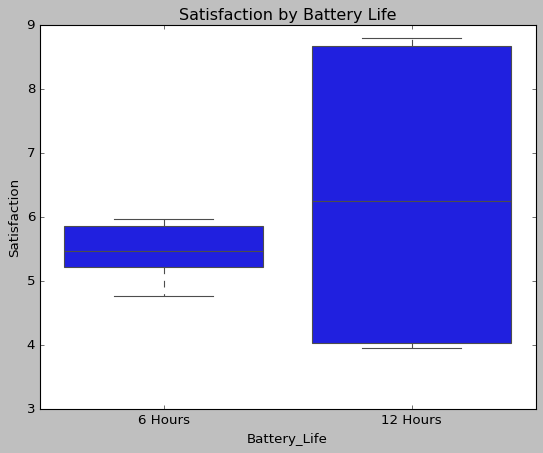

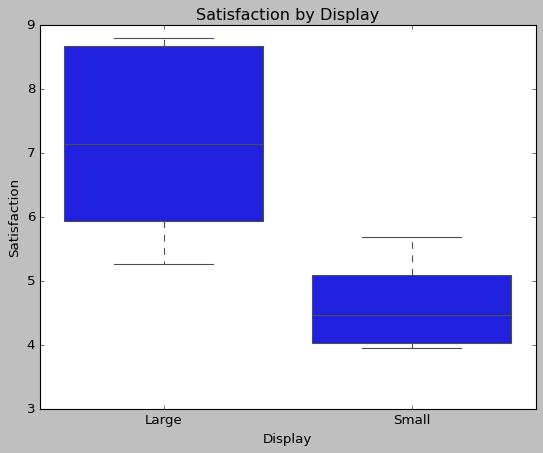

In [23]:
## Question 7 Code ##

## Import relevant libraries ##
import pandas as pd
import numpy as np

## Read in the Data ##

band = pd.read_excel("Fitness Band Experiment.xlsx")

## Evaluate the Data ##

print(band.info())
print(band.head())

## Add Effect Column to buster dataframe ##

band['Effect'] = np.repeat(["c","b","a","abc"],repeats=3)

print(band.head())

## Calculate Summary Statistics for the Main Effects ##

import seaborn as sns
import matplotlib.pyplot as plt

## GPS_Accuracy ##

gps_effect = band.groupby('GPS_Accuracy')['Satisfaction'].agg(['mean','std']).reset_index()

print(gps_effect)

## Battery_Life Effect ##

battery_effect = band.groupby('Battery_Life')['Satisfaction'].agg(['mean','std']).reset_index()

print(battery_effect)

## Display Effect ##

display_effect = band.groupby('Display')['Satisfaction'].agg(['mean','std']).reset_index()

print(display_effect)

## Plot Boxplots for Each Factor using seaborn ##

## GPS_Accuracy Boxplot ##

sns.boxplot(x='GPS_Accuracy', y='Satisfaction', data=band)
plt.title('Satisfaction by GPS Accuracy Level')
plt.show()

## Battery_Life Boxplot ##

sns.boxplot(x='Battery_Life', y='Satisfaction', data=band)
plt.title('Satisfaction by Battery Life')
plt.show()

## Display Boxplot ##
sns.boxplot(x='Display', y='Satisfaction', data=band)
plt.title('Satisfaction by Display')
plt.show()


The visuals seem to support the alternate hypothesis for GPS accuracy and display.


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?


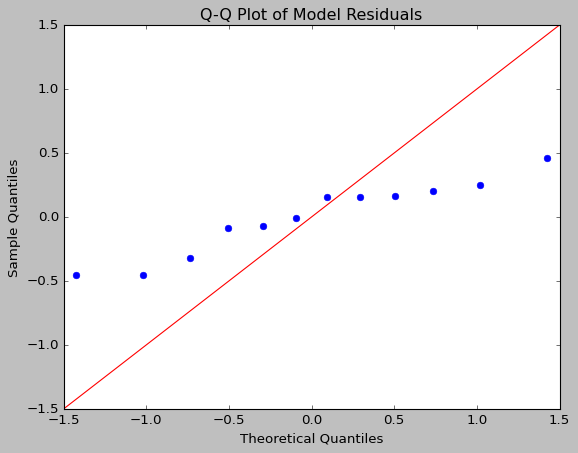

Shapiro-Wilk Test Statistic: 0.9284071225902285
p-value: 0.36353430745848825


In [24]:
## Question 8 Code ##
## First, import ols function ##

from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

## Fit the Model ##

buster_mod = ols('Satisfaction ~ GPS_Accuracy + Battery_Life + Display', data=band).fit()

## Extract Model Residuals ##

residuals = buster_mod.resid

## Use statsmodels to plot qqplot ##

sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Model Residuals')
plt.show()

## Run Shapiro-Wilk Test for Normality ##

shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}')
print(f'p-value: {shapiro_test.pvalue}')

The QQ plot does not suggest normality as the points so not follow the diagonal line. The p value from the SW test however does suggest normality since it is greater than 0.05.


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


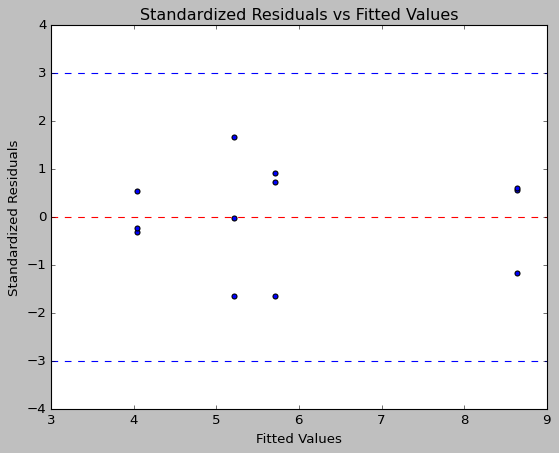

F-statistic: 1.5383564718475287
F p-value: 0.27793737988382194


In [25]:
## Question 9 Code ##
## Generate Scatterplot of Standardized Residuals vs Fitted Values ##

standard_res = buster_mod.get_influence().resid_studentized_internal
fitted_vals = buster_mod.fittedvalues

plt.scatter(fitted_vals, standard_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='b', linestyle='--')
plt.axhline(y=-3, color='b', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted Values')
plt.show()

## Perform Breusch-Pagan Test for Homoscedasticity ##

bp_test = het_breuschpagan(residuals, buster_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")


The assumpation of homogeneity is met given that the standardized residuals fall between -3 and 3 and the p-value from the BP test is greater than 0.05.

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [26]:
## Question 10 Code ##
## Print the ANOVA table ##

print(sm.stats.anova_lm(buster_mod, typ=1))

               df     sum_sq    mean_sq           F    PR(>F)
GPS_Accuracy  1.0  12.587008  12.587008  108.314163  0.000006
Battery_Life  1.0   2.262008   2.262008   19.465113  0.002251
Display       1.0  19.482008  19.482008  167.647257  0.000001
Residual      8.0   0.929667   0.116208         NaN       NaN


All of the main effects are significant at the 0.05 signifcance level.

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [27]:
## Question 11 Code ##
## Group the Data by the Effect column and pivot from long to wide ##

df = (band.groupby("Effect", as_index=False)["Satisfaction"].mean())

## Now we want to pivot the DataFrame from long to wide format
## so that each effect is a separate column ##

df = df.pivot_table(index=None, columns='Effect', values='Satisfaction').reset_index(drop=True)

## Extract factor columns for easier use ##

a   = df['a']
b   = df['b']
c   = df['c']
abc = df['abc']

## Compute factor estimates ##

df2 = pd.DataFrame({
    "A": 0.5 * (a - b - c + abc),
    "B": 0.5 * (-a + b - c + abc),
    "C": 0.5 * (-a - b + c + abc)
})

print(df)
print(df2)


Effect         a       abc         b         c
0       4.036667  8.633333  5.216667  5.716667
          A         B         C
0  0.868333  2.048333  2.548333


As GPS accuracy goes from the - level of standard to the + level of high, we expect an increase of satisfaction level by 0.87.
As battery life goes from the - level of 6 hours to the + level of 12 hours, we expect an increase of satisfaction level by 2.05.
As display goes from the - level of small to the + level of large, we expect an increase of satisfaciton by 2.55.

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [28]:
## Question 12 Code ##
## Calculate Partial Eta Squared for Each Factor ##

## Load pingouin ##

import pingouin as pg

## Fit ANOVA with pingouin ##

mod2 = pg.anova(data=band, dv='Satisfaction', between=['GPS_Accuracy','Battery_Life','Display'], detailed=True)

print(mod2[["Source","np2"]][:3])


         Source       np2
0  GPS_Accuracy  0.931221
1  Battery_Life  0.708721
2       Display  0.954454


The main effects of GPS Accuracy, Battery Life, and Display are accounting for 93.1%, 70.9%, and 95.4% of the variance in the response variable, respectively.

13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?

 Given how each level of the main effects impacted satisfaction score as reported by the factor estimates, high GPS accuracy, 12 hour battery life, and large display were associated with an increase in satisfaction when compared to the negative levels. Therefore, I would recommend that comation of factors to the manufacturer.